In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<Axes: xlabel='msrp', ylabel='Count'>

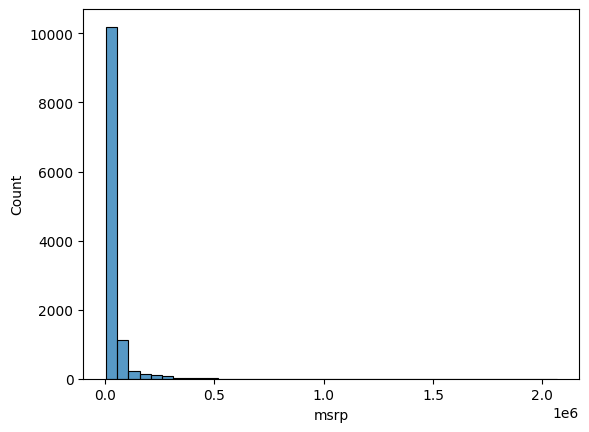

In [35]:
sns.histplot(df.msrp, bins=40)

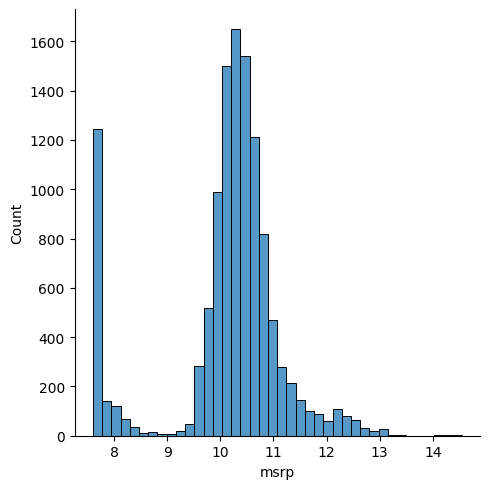

In [37]:
log_price = np.log1p(df.msrp)
sns.displot(log_price, bins=40)

In [8]:
df.columns= df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [38]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [39]:
#dataset splitting

In [40]:
n = len(df)

n_val = int(.2 * n)
n_test = int(.2 * n)
n_train = n - int(n_test + n_val)


In [41]:
#created a fixed random generator so that the data remains constant even

In [42]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [43]:
#Now Spliting begins

In [44]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [45]:
# splitting into target values for all data-split

In [46]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [47]:
# delete target values in the training, testing, validation dataframes

In [48]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [49]:
# Figure out the g(X) aka linear regression

In [50]:
w = [7.9,.01,.04,.002]
def g(xi):
    result = 0
    for x in range(len(xi)):
        result += w[x+1] * xi[x]
    return result+w[0]
xi = [453, 11, 86]
print(np.exp(g(xi))-1)

461389.48385150096


In [51]:
predictions = []

In [52]:
def train_linear_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #weights
    return w[0], w[1:]


In [53]:
# y_pred = w0 + X.dot(w)

In [54]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [55]:
df_nums = df_train[base]

In [56]:
df_nums = df_nums.fillna(0)
X_train = df_nums.values

In [57]:
w0, w = train_linear_reg(X_train, y_train)

In [59]:
w0

7.927257388069986

In [60]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [61]:
 y_pred = w0 + X_train.dot(w)

In [62]:
np.exp(y_pred)-1

array([ 14014.62180872,  11935.30375066,  15865.69570384, ...,
        29857.6585652 , 159194.99512196,  21995.33467203])

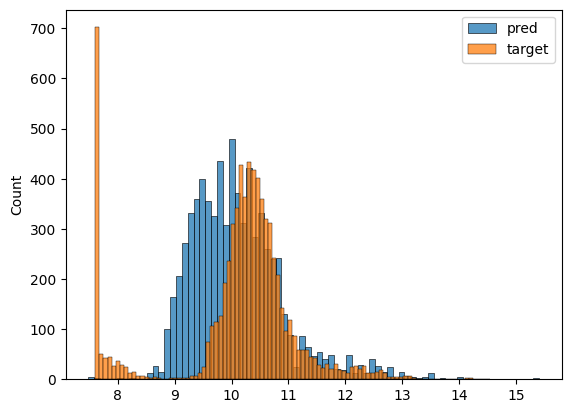

In [63]:
sns.histplot(y_pred, label='pred')
sns.histplot(y_train, label='target')
plt.legend()

In [64]:
# .2 RMSE

In [65]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)


In [66]:
rmse(y_train, y_pred)

0.7554192603920132

In [67]:
df_nums = df_val[base]
df_nums = df_nums.fillna(0)
X_val = df_nums.values

In [68]:
y_pred = w0 + X_val.dot(w)

In [69]:
rmse(y_val, y_pred)

0.761653099130156

In [70]:
# df_train['age'] = 2017 - df_train.year

In [71]:
# global features
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    df_nums = df[features]
    df_nums = df_nums.fillna(0)
    X = df_nums.values
    return X

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058299

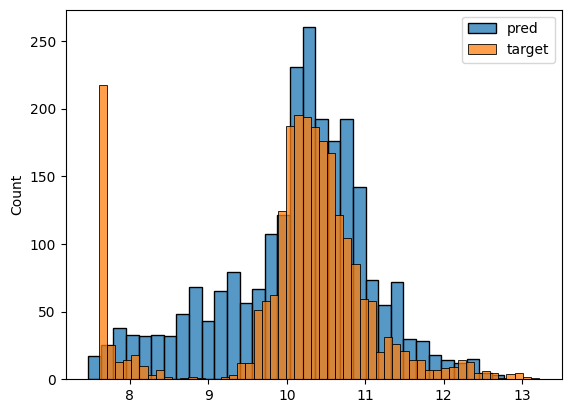

In [73]:
sns.histplot(y_pred, label='pred')
sns.histplot(y_val, label='target')
plt.legend()

In [74]:
e = df['market_category']
len(e)
e[6843]

'crossover,luxury'

In [205]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
 
    df['age'] = 2017 - df.year
    features.append('age')
 
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
 
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 'bmw', 'acura', 'lincoln', 'audi', 'volvo', 'honda']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
     
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
 
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
 
    for v in ['1_series_m', '1_series', 'zdx', 'zephyr' 'venza', 'accord','veloster','tacoma','sienna',
                'range_rover_evoque','9-7x', 's-15_jimmy', 'envoy_xl', 'esteem', 'gallardo', 'cts_wagon']:
        feature = 'is_model_%s' %v
        df[feature] = (df['model'] == v).astype(int)
        features.append(feature)
        
    for v in ['premium_unleaded_(required)', 'premium_unleaded_(recommeded)', 'regular_unleaded' ]:
        feature = 'is_eft_%s' %v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive',
              'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
 
    for v in ['crossover', 'flex_fuel', 'luxury',
              'luxury,performance', 'hatchback', 'performance', 'flex_fuel,performance','flex_fuel','hatchback,performance',
              'crossover,luxury'
             ]:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
 
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
 
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible',
              '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [206]:
# X_train = prepare_X(df_train)
# w0, w = train_linear_reg(X_train, y_train)

# X_val = prepare_X(df_val)
# y_pred = w0 + X_val.dot(w)

# rmse(y_val, y_pred)

In [207]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
 
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
 
    return w[0], w[1:]

In [212]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.45868724220994245

In [213]:
np.exp(y_pred)-1



array([29122.6411522 , 58381.56697797, 25412.09953749, ...,
       45970.43624523, 24708.05033149, 38936.98261176])

In [214]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)


0.4568541377787309

In [215]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
}
df_test = pd.DataFrame([ad])

In [216]:
X_test = prepare_X(df_test)

In [217]:
y_pred = w0 + X_test.dot(w)
np.expm1(y_pred)

array([29835.99549657])

In [ ]:
rmse(y_val, y_pre)